In [1]:
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
def fibonacci_sphere(R=1.0, samples=1):

    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = R*(1 - (i / float(samples - 1)) * 2)  # y goes from 1 to -1
        radius = math.sqrt(R*R - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append([x, y, z])

    return points



def trimer(R=1.0, samples=1):

    points = []
    phi = math.pi * (360 + 10*1.55)/180/3  # twist angle in radians
    rise = 10 * 4.75/1000/3                    # rise in kA

    for i in range(samples):
        z = i*rise  # y goes from 1 to -1

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * R
        y = math.sin(theta) * R

        points.append([x, y, z])

    return points

def fibonacci_cylinder(R=1.0, samples=1, rise=0.02):

    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        z = i*rise  # y goes from 1 to -1
        theta = phi * i  # golden angle increment

        x = math.cos(theta) * R
        y = math.sin(theta) * R

        points.append([x, y, z])

    return points

In [3]:
from scipy import integrate
import scipy.io as sio
import matplotlib.colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [63]:
L=5                        #radius of condensate
R=0.25                     #RNA length/2
r_i = 4
r_o = 4.5#1.1
#x = np.arange(20,800,50)  #aggregate size
x = np.arange(10,550,30)
epsilon = 0.005
D_o=30
k_in = 2
coef = k_in/4/np.pi
lamb0 = 1+coef/D_o*(-1/(2*R))
D_in=[1,3,30]  
#D_in=[1]

final=[]


for D_i in D_in:
    D_p = D_o + D_i
    D_m = D_o - D_i
    
    y2 = lambda t,a1,a2,a3,b1,b2,b3: t**(-D_o/D_p)/((a1-b1*t)**2+(a2-b2*t)**2+(a3-b3*t)**2)**(0.5)
    
    for sample in range(1):   #run 5 times to calculate statistic average and variance          
        ansN=[]

        for N in x:
#             pos_B=fibonacci_sphere(r_o,N)
#             pos_E=fibonacci_sphere(r_i,N)
            pos_B=fibonacci_sphere(r_i,N)
            pos_E=fibonacci_sphere(r_o,N)
            M=len(pos_B)       
            lamb=np.zeros((M,M))
            for j in range(M):          
                rk_E=L/np.sqrt(np.dot(pos_E[j],pos_E[j]))
                rk_B=L/np.sqrt(np.dot(pos_B[j],pos_B[j]))
                for k in range(M):
                    if j == k:
                        vec2 = np.subtract(pos_B[k], pos_E[j])
                        vec4 = np.subtract(pos_B[k], [rk_E**2*pos_E[j][0],rk_E**2*pos_E[j][1],rk_E**2*pos_E[j][2]])
                        lamb1 = - (1/D_i/np.sqrt(np.dot(vec2,vec2))-rk_E*D_m/D_p/D_i/np.sqrt(np.dot(vec4,vec4))) - \
                            (D_m/D_p**2)*(-rk_E*integrate.quad(y2, 1, np.inf,args=(pos_B[k][0],pos_B[k][1],pos_B[k][2],rk_E**2*pos_E[j][0],rk_E**2*pos_E[j][1],rk_E**2*pos_E[j][2]))[0])                        
                        
                        lamb[k][j] = 1+coef*lamb1
                        
                    else:
                        vec1 = np.subtract(pos_B[k], pos_B[j])
                        vec2 = np.subtract(pos_B[k], pos_E[j])
                        vec3 = np.subtract(pos_B[k], [rk_B**2*pos_B[j][0],rk_B**2*pos_B[j][1],rk_B**2*pos_B[j][2]])
                        vec4 = np.subtract(pos_B[k], [rk_E**2*pos_E[j][0],rk_E**2*pos_E[j][1],rk_E**2*pos_E[j][2]])
                        if (np.sqrt(np.dot(vec1,vec1))<2*epsilon) or (np.sqrt(np.dot(vec2,vec2))<2*epsilon): ipy_exit() #make sure sinks/sources are not collapse with each other
                        
                        lamb[k][j] = 1/D_i/np.sqrt(np.dot(vec1,vec1))-rk_B*D_m/D_p/D_i/np.sqrt(np.dot(vec3,vec3)) - (1/D_i/np.sqrt(np.dot(vec2,vec2))-rk_E*D_m/D_p/D_i/np.sqrt(np.dot(vec4,vec4))) - \
                            (D_m/D_p**2)* \
                            (rk_B*integrate.quad(y2, 1, np.inf,args=(pos_B[k][0],pos_B[k][1],pos_B[k][2],rk_B**2*pos_B[j][0],rk_B**2*pos_B[j][1],rk_B**2*pos_B[j][2]))[0] - \
                             rk_E*integrate.quad(y2, 1, np.inf,args=(pos_B[k][0],pos_B[k][1],pos_B[k][2],rk_E**2*pos_E[j][0],rk_E**2*pos_E[j][1],rk_E**2*pos_E[j][2]))[0])                        
                        
                        lamb[k][j] = coef*lamb[k][j]
                                                
            lambr = np.linalg.inv(lamb)
            c0 = np.ones(M)
            ans = lambr.dot(c0)
            ansN.append(np.mean(ans)*lamb0)

    
    final.append(ansN)
    
#np.savetxt("Polar_conden_c.dat",final)
np.savetxt("Polar_conden_r.dat",final)

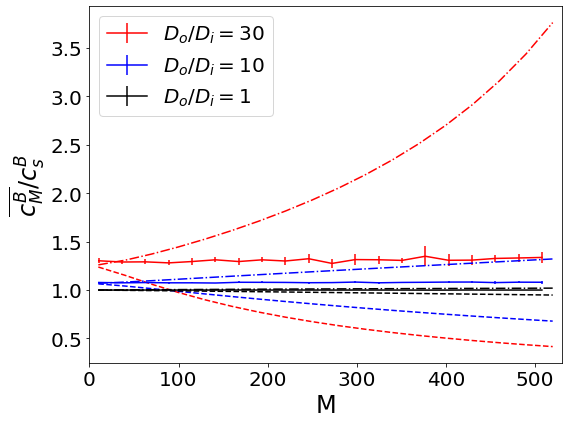

In [74]:
final1=np.loadtxt("Random.dat")
final_std1=np.loadtxt("Random_std.dat")
x = np.arange(20,1000,50) 
final2=np.loadtxt("Random_add.dat")
final_std2=np.loadtxt("Random_std_add.dat")

final=np.transpose(np.concatenate((np.transpose(final1),np.transpose(final2))))
final_std=np.transpose(np.concatenate((np.transpose(final_std1),np.transpose(final_std2))))

D_in=[1,3,30]
D_o=30
c=['red','blue','black']

plt.figure(figsize=(8,6))
for i in range(len(D_in)):
    plt.errorbar(x/1000*4*np.pi/3*5**3, final[i], yerr=final_std[i], label="$D_{o}/D_{i}=$"+str(int(D_o/D_in[i])), color=c[i])
    
    
rate=np.loadtxt("Polar_conden_r.dat")  
x = np.arange(10,550,30)
for i in range(len(D_in)):
    plt.plot(x, rate[i], '--', color=c[i])
    
    
rate=np.loadtxt("Polar_conden_c.dat")  
x = np.arange(10,550,30)
for i in range(len(D_in)):
    plt.plot(x, rate[i], '-.', color=c[i])


plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,530)
plt.xlabel("M", fontsize=24)
plt.ylabel(r"$\overline{c^B_M}/c^B_s$", fontsize=24)
plt.legend(fontsize=20)
#plt.ylim(0.92,1.005)
plt.tight_layout()
plt.savefig("Polar_condensate_k2.png")

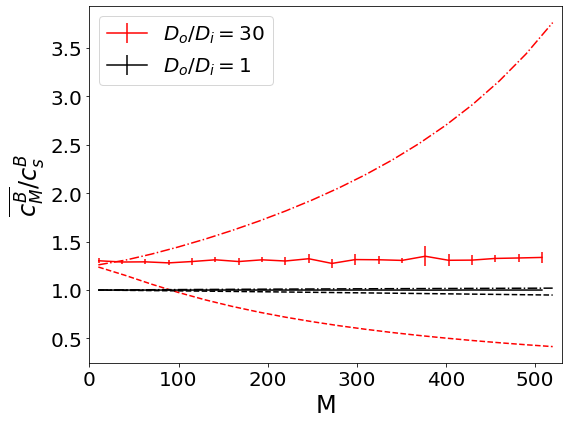

In [271]:
final1=np.loadtxt("Random.dat")
final_std1=np.loadtxt("Random_std.dat")
x = np.arange(20,1000,50) 
final2=np.loadtxt("Random_add.dat")
final_std2=np.loadtxt("Random_std_add.dat")

final=np.transpose(np.concatenate((np.transpose(final1),np.transpose(final2))))
final_std=np.transpose(np.concatenate((np.transpose(final_std1),np.transpose(final_std2))))

D_in=[1,3,30]
D_o=30
c=['red','blue','black']

plt.figure(figsize=(8,6))
for i in range(len(D_in)):
    if i != 1:
        plt.errorbar(x/1000*4*np.pi/3*5**3, final[i], yerr=final_std[i], label="$D_{o}/D_{i}=$"+str(int(D_o/D_in[i])), color=c[i])
    
    
rate=np.loadtxt("Polar_conden_r.dat")  
x = np.arange(10,550,30)
for i in range(len(D_in)):
    if i != 1:
        plt.plot(x, rate[i], '--', color=c[i])
    
    
rate=np.loadtxt("Polar_conden_c.dat")  
x = np.arange(10,550,30)
for i in range(len(D_in)):
    if i != 1:
        plt.plot(x, rate[i], '-.', color=c[i])


plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,530)
plt.xlabel("M", fontsize=24)
plt.ylabel(r"$\overline{c^B_M}/c^B_s$", fontsize=24)
plt.legend(fontsize=20)
#plt.ylim(0.92,1.005)
plt.tight_layout()
plt.savefig("Polar_condensate_k2.png")

In [281]:
L=5                        #radius of condensate
R=0.25                     #RNA length/2
r_i = 4
r_o = 4.5
#x = np.arange(20,800,50)  #aggregate size
x = [100]
epsilon = 0.005
D_o=30
k_in = 2
coef = k_in/4/np.pi
lamb0 = 1+coef/D_o*(-1/(2*R)) 
D_in=[1]

for D_i in D_in:
    D_p = D_o + D_i
    D_m = D_o - D_i
    
    y2 = lambda t,a1,a2,a3,b1,b2,b3: t**(-D_o/D_p)/((a1-b1*t)**2+(a2-b2*t)**2+(a3-b3*t)**2)**(0.5)
    
    for sample in range(1):   #run 5 times to calculate statistic average and variance          
        ansN=[]

        for N in x:
            pos_B=fibonacci_sphere(r_o,N)
            pos_E=fibonacci_sphere(r_i,N)
#             pos_B=fibonacci_sphere(r_i,N)
#             pos_E=fibonacci_sphere(r_o,N)
            M=len(pos_B)       
            lamb=np.zeros((M,M))
            for j in range(M):          
                rk_E=L/np.sqrt(np.dot(pos_E[j],pos_E[j]))
                rk_B=L/np.sqrt(np.dot(pos_B[j],pos_B[j]))
                for k in range(M):
                    if j == k:
                        vec2 = np.subtract(pos_B[k], pos_E[j])
                        vec4 = np.subtract(pos_B[k], [rk_E**2*pos_E[j][0],rk_E**2*pos_E[j][1],rk_E**2*pos_E[j][2]])
                        lamb1 = - (1/D_i/np.sqrt(np.dot(vec2,vec2))-rk_E*D_m/D_p/D_i/np.sqrt(np.dot(vec4,vec4))) - \
                            (D_m/D_p**2)*(-rk_E*integrate.quad(y2, 1, np.inf,args=(pos_B[k][0],pos_B[k][1],pos_B[k][2],rk_E**2*pos_E[j][0],rk_E**2*pos_E[j][1],rk_E**2*pos_E[j][2]))[0])                        
                        
                        lamb[k][j] = 1+coef*lamb1
                        
                    else:
                        vec1 = np.subtract(pos_B[k], pos_B[j])
                        vec2 = np.subtract(pos_B[k], pos_E[j])
                        vec3 = np.subtract(pos_B[k], [rk_B**2*pos_B[j][0],rk_B**2*pos_B[j][1],rk_B**2*pos_B[j][2]])
                        vec4 = np.subtract(pos_B[k], [rk_E**2*pos_E[j][0],rk_E**2*pos_E[j][1],rk_E**2*pos_E[j][2]])
                        if (np.sqrt(np.dot(vec1,vec1))<2*epsilon) or (np.sqrt(np.dot(vec2,vec2))<2*epsilon): ipy_exit() #make sure sinks/sources are not collapse with each other
                        
                        lamb[k][j] = 1/D_i/np.sqrt(np.dot(vec1,vec1))-rk_B*D_m/D_p/D_i/np.sqrt(np.dot(vec3,vec3)) - (1/D_i/np.sqrt(np.dot(vec2,vec2))-rk_E*D_m/D_p/D_i/np.sqrt(np.dot(vec4,vec4))) - \
                            (D_m/D_p**2)* \
                            (rk_B*integrate.quad(y2, 1, np.inf,args=(pos_B[k][0],pos_B[k][1],pos_B[k][2],rk_B**2*pos_B[j][0],rk_B**2*pos_B[j][1],rk_B**2*pos_B[j][2]))[0] - \
                             rk_E*integrate.quad(y2, 1, np.inf,args=(pos_B[k][0],pos_B[k][1],pos_B[k][2],rk_E**2*pos_E[j][0],rk_E**2*pos_E[j][1],rk_E**2*pos_E[j][2]))[0])                        
                        
                        lamb[k][j] = coef*lamb[k][j]
                                                
            #lambr = np.linalg.inv(lamb)
            c0 = np.ones(M)
            ans = np.linalg.solve(lamb,c0)
            ansN.append(np.mean(ans)*lamb0)

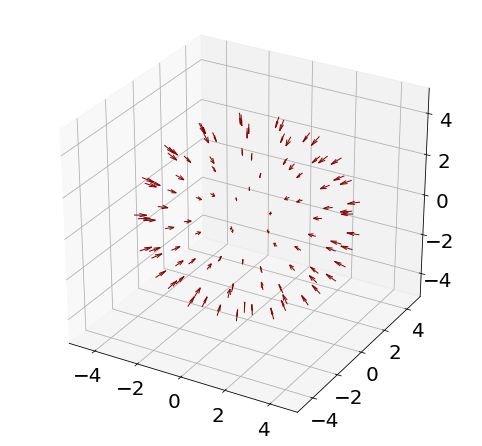

In [282]:
fig = plt.figure(figsize=(6.5,6))
ax = Axes3D(fig)
c = ans*lamb0
cmax = np.max(abs(c-1))
tmp=np.transpose(pos_B)
tmp2=np.transpose(pos_E)

norm = matplotlib.colors.Normalize(vmin=1-cmax, vmax=1+cmax)
cmap = matplotlib.cm.get_cmap("seismic")



c = np.concatenate((c, np.repeat(c, 2)))
ax.quiver(tmp[0], tmp[1], tmp[2], tmp2[0]-tmp[0], tmp2[1]-tmp[1], tmp2[2]-tmp[2], color=cmap(norm(c)), arrow_length_ratio=0.6, lw=1)

ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='z', labelsize=20)
#plt.savefig("M100_Di1_r_Polar_condensate_k2.png")
plt.savefig("M100_Di1_c_Polar_condensate_k2.png")

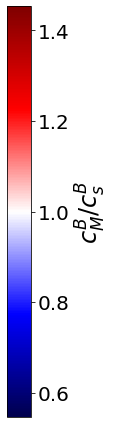

In [285]:
fig, ax = plt.subplots(figsize=(1.7, 6))
cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),cax=ax)
cbar.ax.tick_params(labelsize=20) 
cbar.set_label("$c^B_M/c^B_s$", fontsize=24)
plt.tight_layout()
#plt.savefig("cb_M100_Di1_r_Polar_condensate_k2.png")
plt.savefig("cb_M100_Di1_c_Polar_condensate_k2.png")

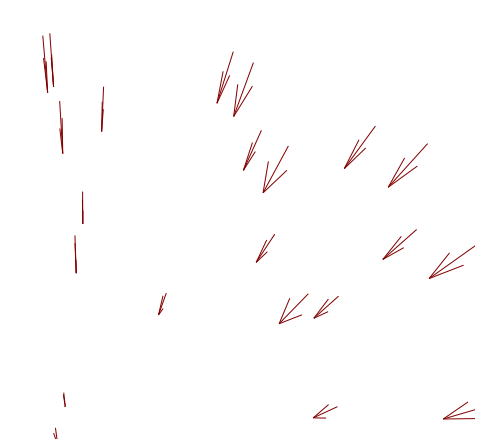

In [286]:
fig = plt.figure(figsize=(6.5,6))
ax = Axes3D(fig)
c = ans*lamb0
cmax = np.max(abs(c-1))
tmp=np.transpose(pos_B)
tmp2=np.transpose(pos_E)

norm = matplotlib.colors.Normalize(vmin=1-cmax, vmax=1+cmax)
cmap = matplotlib.cm.get_cmap("seismic")



c = np.concatenate((c, np.repeat(c, 2)))
ax.quiver(tmp[0], tmp[1], tmp[2], tmp2[0]-tmp[0], tmp2[1]-tmp[1], tmp2[2]-tmp[2], color=cmap(norm(c)), arrow_length_ratio=0.6, lw=1)

ax.set_xlim3d(0, 2)
ax.set_ylim3d(0, 2)
ax.set_zlim3d(2, 4)

ax.grid(False)

# Hide axes ticks
plt.axis('off')
#plt.savefig("zoom_M100_Di1_r_Polar_condensate_k2.png")
plt.savefig("zoom_M100_Di1_c_Polar_condensate_k2.png")

In [287]:
k_in = 2
L=5
x = np.linspace(-L, L, 100)
y = np.linspace(-L, L, 100)
z = 0
xv, yv, zv = np.meshgrid(x, y, z)
meshT=[]
meshT.append(np.concatenate(xv,axis=None))
meshT.append(np.concatenate(yv,axis=None))
meshT.append(np.concatenate(zv,axis=None))
mesh = np.transpose(meshT)
c=[]
for i in range(len(mesh)):
    con=0
    if np.sqrt(np.dot(mesh[i],mesh[i])) < L:
        for j in range(len(ans)):
            con += ans[j]*in_green_dipole(mesh[i], pos_E[j], pos_B[j], L=5, D_o=30, D_i=1)
    else:
        for j in range(len(ans)):
            con += ans[j]*out_green_dipole(mesh[i], pos_E[j], pos_B[j], L=5, D_o=30, D_i=1)
        
    c.append(1-k_in*con)  

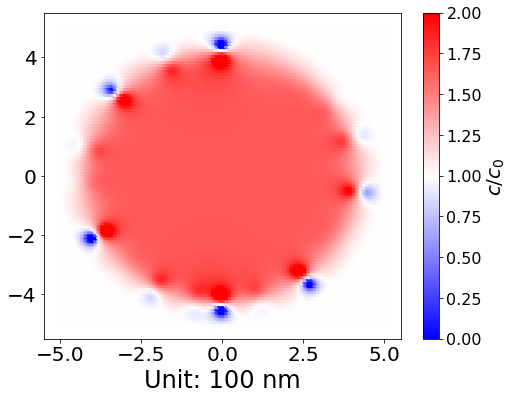

In [288]:
plt.figure(figsize=(8,6))
plt.scatter(meshT[0],meshT[1],c=c,vmin=0,vmax=2,cmap='bwr') 
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("Unit: 100 nm", fontsize=24)
cbar=plt.colorbar()
cbar.set_label(label="$c/c_0$",size=20)
cbar.ax.tick_params(labelsize=16)
#plt.savefig("C_M100_Di1_r_Polar_condensate_k2.png")
plt.savefig("C_M100_Di1_c_Polar_condensate_k2.png")

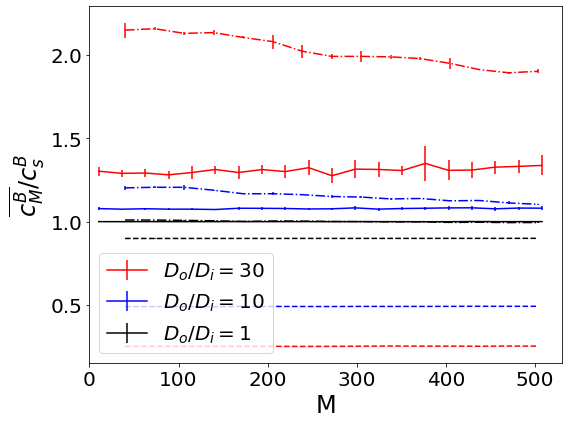

In [268]:
final1=np.loadtxt("Random.dat")
final_std1=np.loadtxt("Random_std.dat")
x = np.arange(20,1000,50) 
final2=np.loadtxt("Random_add.dat")
final_std2=np.loadtxt("Random_std_add.dat")

final=np.transpose(np.concatenate((np.transpose(final1),np.transpose(final2))))
final_std=np.transpose(np.concatenate((np.transpose(final_std1),np.transpose(final_std2))))
D_in=[1,3,30]
D_o=30
c=['red','blue','black']

plt.figure(figsize=(8,6))
for i in range(len(D_in)):
    plt.errorbar(x/1000*4*np.pi/3*5**3, final[i], yerr=final_std[i], label="$D_{o}/D_{i}=$"+str(int(D_o/D_in[i])), color=c[i])
    
    
final = np.loadtxt("local_P_r.dat") 
final_std = np.loadtxt("local_P_std_r.dat") 
px = np.linspace(0.05, 0.63, 15)
x = px*800
for i in range(len(D_in)):
    plt.errorbar(x, final[i], yerr=final_std[i], ls='--', color=c[i])
    
    
final = np.loadtxt("local_P_c.dat") 
final_std = np.loadtxt("local_P_std_c.dat")  
px = np.linspace(0.05, 0.63, 15)
x = px*800
for i in range(len(D_in)):
    plt.errorbar(x, final[i], yerr=final_std[i], ls='-.', color=c[i])


plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,530)
plt.xlabel("M", fontsize=24)
plt.ylabel(r"$\overline{c^B_M}/c^B_s$", fontsize=24)
plt.legend(fontsize=20,loc=3)
#plt.ylim(0.92,1.005)
plt.tight_layout()
plt.savefig("local_polar_condensate_k2.png")

In [335]:
L=5                        #radius of condensate
R=0.25                     #RNA length/2
r_i = 0.1
r_o = 0.6#1.1
#x = np.arange(20,800,50)  #aggregate size
#px = np.linspace(0.05, 0.7, 15)
px = [1/8]   #M=100
Ns = 5
epsilon = 0.005
D_o=30
k_in = 2
coef = k_in/4/np.pi
lamb0 = 1+coef/D_o*(-1/(2*R))
D_in=[1]  


grid=8
g=[]

x = np.linspace(-L, L, grid, endpoint=False)+L/grid
y = np.linspace(-L, L, grid, endpoint=False)+L/grid
z = np.linspace(-L, L, grid, endpoint=False)+L/grid
xv, yv, zv = np.meshgrid(x, y, z)
meshT=[]
meshT.append(np.concatenate(xv,axis=None))
meshT.append(np.concatenate(yv,axis=None))
meshT.append(np.concatenate(zv,axis=None))
mesh = np.transpose(meshT)

for i in range(len(mesh)):
    if (mesh[i][0]**2 + mesh[i][1]**2 + mesh[i][2]**2) < (L-L/grid)**2:           
        g.append(mesh[i])


for D_i in D_in:
    D_p = D_o + D_i
    D_m = D_o - D_i
    
    y2 = lambda t,a1,a2,a3,b1,b2,b3: t**(-D_o/D_p)/((a1-b1*t)**2+(a2-b2*t)**2+(a3-b3*t)**2)**(0.5)
    
    for sample in range(1):   #run 5 times to calculate statistic average and variance          
        ansN=[]

        for p in px:
            pos_B=[]
            pos_E=[]

            for i in range(len(g)):
                if np.random.rand(1) < p:
#                         s1_pos_B=fibonacci_sphere(r_i,Ns)
#                         s1_pos_E=fibonacci_sphere(r_o,Ns) 
                        s1_pos_E=fibonacci_sphere(r_i,Ns)
                        s1_pos_B=fibonacci_sphere(r_o,Ns) 
                        for j in range(Ns):
                            for k in range(3):
                                s1_pos_B[j][k] += g[i][k]
                                s1_pos_E[j][k] += g[i][k]

                            pos_B.append(s1_pos_B[j])
                            pos_E.append(s1_pos_E[j]) 

            
            
            M=len(pos_B)       
            lamb=np.zeros((M,M))
            for j in range(M):          
                rk_E=L/np.sqrt(np.dot(pos_E[j],pos_E[j]))
                rk_B=L/np.sqrt(np.dot(pos_B[j],pos_B[j]))
                for k in range(M):
                    if j == k:
                        vec2 = np.subtract(pos_B[k], pos_E[j])
                        vec4 = np.subtract(pos_B[k], [rk_E**2*pos_E[j][0],rk_E**2*pos_E[j][1],rk_E**2*pos_E[j][2]])
                        lamb1 = - (1/D_i/np.sqrt(np.dot(vec2,vec2))-rk_E*D_m/D_p/D_i/np.sqrt(np.dot(vec4,vec4))) - \
                            (D_m/D_p**2)*(-rk_E*integrate.quad(y2, 1, np.inf,args=(pos_B[k][0],pos_B[k][1],pos_B[k][2],rk_E**2*pos_E[j][0],rk_E**2*pos_E[j][1],rk_E**2*pos_E[j][2]))[0])                        
                        
                        lamb[k][j] = 1+coef*lamb1
                        
                    else:
                        vec1 = np.subtract(pos_B[k], pos_B[j])
                        vec2 = np.subtract(pos_B[k], pos_E[j])
                        vec3 = np.subtract(pos_B[k], [rk_B**2*pos_B[j][0],rk_B**2*pos_B[j][1],rk_B**2*pos_B[j][2]])
                        vec4 = np.subtract(pos_B[k], [rk_E**2*pos_E[j][0],rk_E**2*pos_E[j][1],rk_E**2*pos_E[j][2]])
                        #if (np.sqrt(np.dot(vec1,vec1))<2*epsilon) or (np.sqrt(np.dot(vec2,vec2))<2*epsilon): ipy_exit() #make sure sinks/sources are not collapse with each other
                        
                        lamb[k][j] = 1/D_i/np.sqrt(np.dot(vec1,vec1))-rk_B*D_m/D_p/D_i/np.sqrt(np.dot(vec3,vec3)) - (1/D_i/np.sqrt(np.dot(vec2,vec2))-rk_E*D_m/D_p/D_i/np.sqrt(np.dot(vec4,vec4))) - \
                            (D_m/D_p**2)* \
                            (rk_B*integrate.quad(y2, 1, np.inf,args=(pos_B[k][0],pos_B[k][1],pos_B[k][2],rk_B**2*pos_B[j][0],rk_B**2*pos_B[j][1],rk_B**2*pos_B[j][2]))[0] - \
                             rk_E*integrate.quad(y2, 1, np.inf,args=(pos_B[k][0],pos_B[k][1],pos_B[k][2],rk_E**2*pos_E[j][0],rk_E**2*pos_E[j][1],rk_E**2*pos_E[j][2]))[0])                        
                        
                        lamb[k][j] = coef*lamb[k][j]
                                                
            lambr = np.linalg.inv(lamb)
            c0 = np.ones(M)
            ans = lambr.dot(c0)
            ansN.append(np.mean(ans)*lamb0)

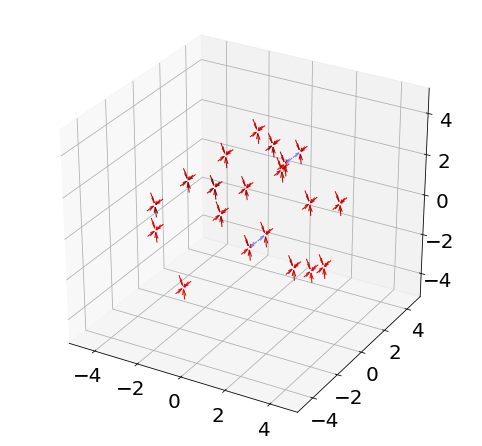

In [345]:
fig = plt.figure(figsize=(6.5,6))
ax = Axes3D(fig)
c = ans*lamb0
cmax = np.max(abs(c-1))
tmp=np.transpose(pos_B)
tmp2=np.transpose(pos_E)

norm = matplotlib.colors.Normalize(vmin=1-cmax, vmax=1+cmax)
cmap = matplotlib.cm.get_cmap("seismic")



c = np.concatenate((c, np.repeat(c, 2)))
ax.quiver(tmp[0], tmp[1], tmp[2], tmp2[0]-tmp[0], tmp2[1]-tmp[1], tmp2[2]-tmp[2], color=cmap(norm(c)), arrow_length_ratio=0.6, lw=1)

ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='z', labelsize=20)
#plt.savefig("M100_Di1_r_local_polar_condensate_k2.png")
plt.savefig("M100_Di1_c_local_polar_condensate_k2.png")

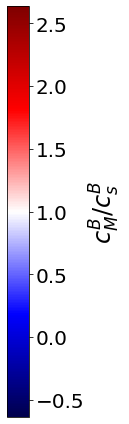

In [346]:
fig, ax = plt.subplots(figsize=(1.9, 6))
cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),cax=ax)
cbar.ax.tick_params(labelsize=20) 
cbar.set_label("$c^B_M/c^B_s$", fontsize=24)
plt.tight_layout()
#plt.savefig("cb_M100_Di1_r_local_polar_condensate_k2.png")
plt.savefig("cb_M100_Di1_c_local_polar_condensate_k2.png")

In [305]:
min(ans)

-0.0029883673295253484

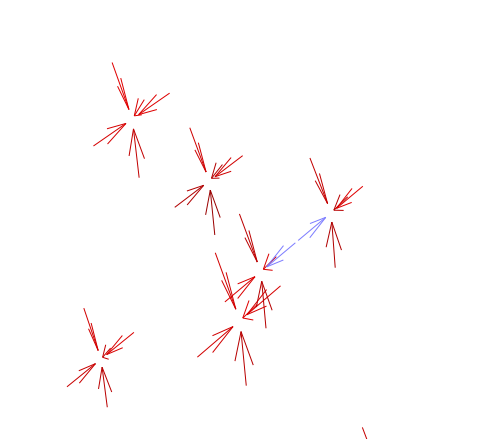

In [349]:
fig = plt.figure(figsize=(6.5,6))
ax = Axes3D(fig)
c = ans*lamb0
cmax = np.max(abs(c-1))
tmp=np.transpose(pos_B)
tmp2=np.transpose(pos_E)

norm = matplotlib.colors.Normalize(vmin=1-cmax, vmax=1+cmax)
cmap = matplotlib.cm.get_cmap("seismic")



c = np.concatenate((c, np.repeat(c, 2)))
ax.quiver(tmp[0], tmp[1], tmp[2], tmp2[0]-tmp[0], tmp2[1]-tmp[1], tmp2[2]-tmp[2], color=cmap(norm(c)), arrow_length_ratio=0.6, lw=1)

ax.set_xlim3d(0, 2)
ax.set_ylim3d(0, 2)
ax.set_zlim3d(2, 4)

ax.grid(False)

# Hide axes ticks
plt.axis('off')
#plt.savefig("zoom_M100_Di1_r_local_polar_condensate_k2.png")
plt.savefig("zoom_M100_Di1_c_local_polar_condensate_k2.png")

In [337]:
len(ans)

100

In [272]:
def in_green_dipole(pos, pos_E, pos_B, L=5, D_o=30, D_i=1):
    D_p = D_o + D_i
    D_m = D_o - D_i
    
    y2 = lambda t,a1,a2,a3,b1,b2,b3: t**(-D_o/D_p)/((a1-b1*t)**2+(a2-b2*t)**2+(a3-b3*t)**2)**(0.5)
    
    rk_E=L/np.sqrt(np.dot(pos_E,pos_E))
    rk_B=L/np.sqrt(np.dot(pos_B,pos_B))
    vec1 = np.subtract(pos, pos_B)
    vec2 = np.subtract(pos, pos_E)
    vec3 = np.subtract(pos, [rk_B**2*pos_B[0],rk_B**2*pos_B[1],rk_B**2*pos_B[2]])
    vec4 = np.subtract(pos, [rk_E**2*pos_E[0],rk_E**2*pos_E[1],rk_E**2*pos_E[2]])

    lamb = 1/D_i/np.sqrt(np.dot(vec1,vec1))-rk_B*D_m/D_p/D_i/np.sqrt(np.dot(vec3,vec3)) - (1/D_i/np.sqrt(np.dot(vec2,vec2))-rk_E*D_m/D_p/D_i/np.sqrt(np.dot(vec4,vec4))) - \
        (D_m/D_p**2)* \
        (rk_B*integrate.quad(y2, 1, np.inf,args=(pos[0],pos[1],pos[2],rk_B**2*pos_B[0],rk_B**2*pos_B[1],rk_B**2*pos_B[2]))[0] - \
         rk_E*integrate.quad(y2, 1, np.inf,args=(pos[0],pos[1],pos[2],rk_E**2*pos_E[0],rk_E**2*pos_E[1],rk_E**2*pos_E[2]))[0])                        

    lamb = lamb/4/np.pi
    return lamb

In [273]:
def out_green_dipole(pos, pos_E, pos_B, L=5, D_o=30, D_i=1):
    D_p = D_o + D_i
    D_m = D_o - D_i
    
    y2 = lambda t,a1,a2,a3,b1,b2,b3: t**(-D_i/D_p)/((a1-b1*t)**2+(a2-b2*t)**2+(a3-b3*t)**2)**(0.5)

    vec1 = np.subtract(pos, pos_B)
    vec2 = np.subtract(pos, pos_E)

    lamb = 2/D_p/np.sqrt(np.dot(vec1,vec1)) - 2/D_p/np.sqrt(np.dot(vec2,vec2)) - \
        (D_m/D_p**2)* \
        (integrate.quad(y2, 0, 1, args=(pos[0],pos[1],pos[2],pos_B[0],pos_B[1],pos_B[2]))[0] - \
         integrate.quad(y2, 0, 1, args=(pos[0],pos[1],pos[2],pos_E[0],pos_E[1],pos_E[2]))[0])                        

    lamb = lamb/4/np.pi
    return lamb

In [351]:
k_in = 2
L=5
x = np.linspace(-L, L, 100)
y = np.linspace(-L, L, 100)
z = 0
xv, yv, zv = np.meshgrid(x, y, z)
meshT=[]
meshT.append(np.concatenate(xv,axis=None))
meshT.append(np.concatenate(yv,axis=None))
meshT.append(np.concatenate(zv,axis=None))
mesh = np.transpose(meshT)
c=[]
for i in range(len(mesh)):
    con=0
    if np.sqrt(np.dot(mesh[i],mesh[i])) < L:
        for j in range(len(ans)):
            con += ans[j]*in_green_dipole(mesh[i], pos_E[j], pos_B[j], L=5, D_o=30, D_i=1)
    else:
        for j in range(len(ans)):
            con += ans[j]*out_green_dipole(mesh[i], pos_E[j], pos_B[j], L=5, D_o=30, D_i=1)
        
    c.append(1-k_in*con)  

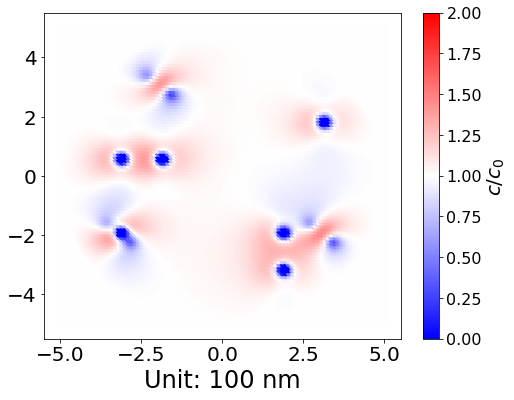

In [352]:
plt.figure(figsize=(8,6))
plt.scatter(meshT[0],meshT[1],c=c,vmin=0,vmax=2,cmap='bwr') 
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("Unit: 100 nm", fontsize=24)
cbar=plt.colorbar()
cbar.set_label(label="$c/c_0$",size=20)
cbar.ax.tick_params(labelsize=16)
#plt.savefig("C_M100_Di1_r_local_polar_condensate_k2.png")
plt.savefig("C_M100_Di1_c_local_polar_condensate_k2.png")